In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [378]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [380]:
df = df.sample(frac=1)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2240,Brunswick,8/705 Park St,2,u,601000.0,S,Brad,18/03/2017,5.2,3056.0,...,1.0,1.0,0.0,57.0,1970.0,Moreland City Council,-37.77780,144.95940,Northern Metropolitan,11918.0
8751,Richmond,22 Buckingham St,2,h,720000.0,S,Biggin,6/08/2016,2.6,3121.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,-37.81410,145.00110,Northern Metropolitan,14949.0
24585,Mount Waverley,378 Waverley Rd,3,h,1375000.0,SA,Noel,14/10/2017,14.2,3149.0,...,1.0,1.0,843.0,140.0,1950.0,Monash City Council,-37.88494,145.12807,Eastern Metropolitan,13366.0
13102,Kew,25/912 Glenferrie Rd,1,u,468000.0,S,hockingstuart,13/05/2017,5.6,3101.0,...,1.0,1.0,0.0,NaN,NaN,Boroondara City Council,-37.80830,145.03820,Southern Metropolitan,10331.0
33474,Kew East,2/8 Hamilton St,2,u,960000.0,S,Nelson,17/03/2018,7.3,3102.0,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,2671.0


In [381]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [382]:
df['Price'].describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [383]:
df = df[df['Price']>0]

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


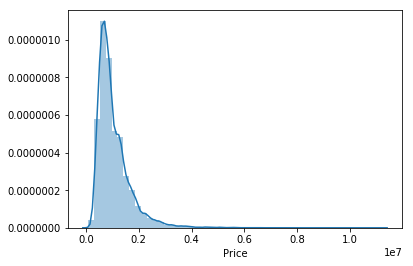

In [384]:
sns.distplot(df['Price'])

In [385]:
df['Price'].skew()

2.58896934105286

In [386]:
ms=df.isnull().sum()
ms[ms>0]/len(df)

Distance         0.000037
Postcode         0.000037
Bedroom2         0.236393
Bathroom         0.236613
Car              0.250450
Landsize         0.340037
BuildingArea     0.608911
YearBuilt        0.556502
CouncilArea      0.000110
Lattitude        0.229530
Longtitude       0.229530
Regionname       0.000110
Propertycount    0.000110
dtype: float64

In [387]:
df = df.drop(['YearBuilt', 'BuildingArea', 'Postcode'], axis=1)

## these columns are dropped as more than 50% missing

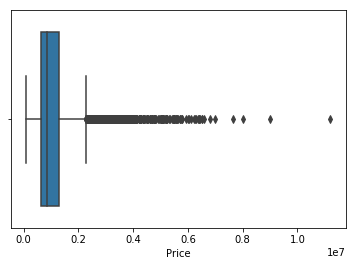

In [388]:
sns.boxplot(df['Price'])
plt.show()

In [389]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr = q3-q1

df = df[df['Price']<(q3+1.5*iqr)]

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


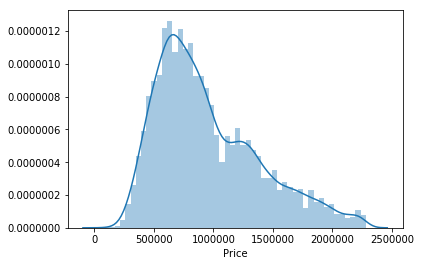

In [390]:
sns.distplot(df['Price'])

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


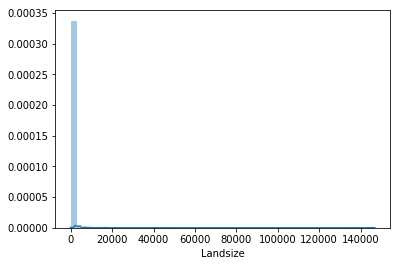

In [391]:
sns.distplot(df['Landsize'].dropna())

In [392]:
df['Landsize'].describe()

count     17026.000000
mean        559.919182
std        1977.411412
min           0.000000
25%         209.000000
50%         492.000000
75%         654.000000
max      146699.000000
Name: Landsize, dtype: float64

In [393]:
q1=df['Landsize'].quantile(0.25)
q3=df['Landsize'].quantile(0.75)
iqr = q3-q1

df = df[~(df['Landsize']>(q3+1.5*iqr))]

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


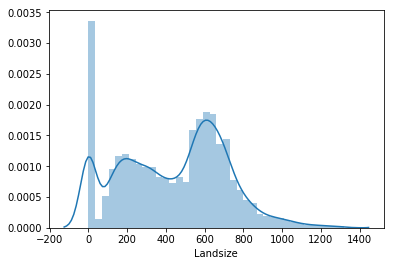

In [394]:
sns.distplot(df['Landsize'].dropna())

In [395]:
df['Landsize'].describe()

count    16621.000000
mean       438.288851
std        275.453882
min          0.000000
25%        205.000000
50%        475.000000
75%        649.000000
max       1321.000000
Name: Landsize, dtype: float64

In [396]:
#df['Landsize']= df['Landsize'].fillna(df['Landsize'].median())

#Filling with median made big change to the distribution of the variable. Hence,
#we will adopt a distribution based imputation (ffill/bfill))

In [397]:
df['Landsize']= df['Landsize'].fillna(method='ffill')

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


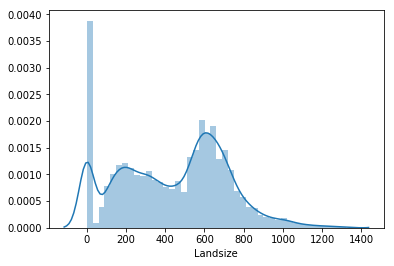

In [398]:
sns.distplot(df['Landsize'])

In [399]:
df['Landsize'].describe()

count    25558.000000
mean       439.127631
std        275.618347
min          0.000000
25%        206.000000
50%        475.000000
75%        650.000000
max       1321.000000
Name: Landsize, dtype: float64

In [400]:
num_cols = list(df.select_dtypes(exclude=['object']).columns)

In [401]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [402]:
df[num_cols]=df[num_cols].fillna(method='ffill')

In [403]:
df['Suburb'].mode()[0]

'Reservoir'

In [404]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode())
#df[cat_cols]=df[cat_cols].fillna('NA')

In [405]:
df['Type'].value_counts()

h    17103
u     5639
t     2816
Name: Type, dtype: int64

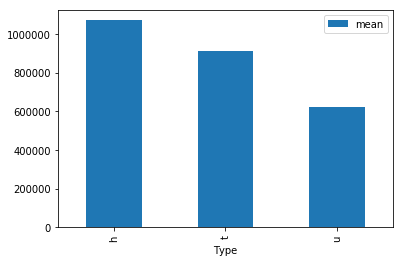

In [406]:
df.groupby('Type')['Price'].agg(['mean']).plot.bar()

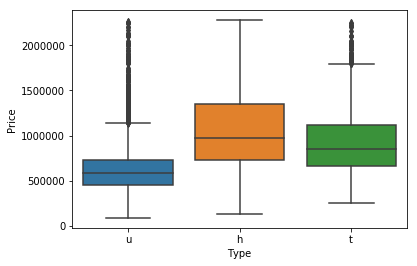

In [407]:
sns.boxplot(x='Type', y='Price', data=df)
plt.show()

In [408]:
q1 = df['Price'].quantile(0.25)
q2 = df['Price'].quantile(0.5)
q3 = df['Price'].quantile(0.75)

def price_cat(pr):
    if pr<q1:
        return 1
    elif q1<= pr <q2:
        return 2
    elif q2<= pr <q3:
        return 3
    else:
        return 4
    
df['price_cat'] = df['Price'].apply(price_cat)

In [409]:
df.groupby('price_cat')['Price'].agg(['min', 'max'])

,min,max
price_cat,,
1,85000.0,628200.0
2,629000.0,849500.0
3,850000.0,1218500.0
4,1220000.0,2280000.0


In [410]:
pd.crosstab(df['price_cat'], df['Type'], normalize=0)

Type,h,t,u
price_cat,,,
1,0.386097,0.089713,0.524190
2,0.624289,0.131554,0.244157
3,0.776858,0.138507,0.084635
4,0.887179,0.081274,0.031546


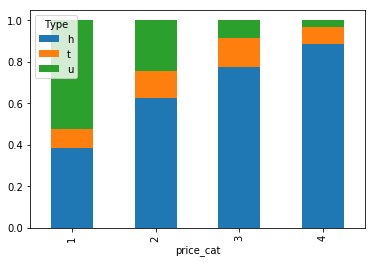

In [411]:
ct=pd.crosstab(df['price_cat'], df['Type'], normalize=0)
ct.plot.bar(stacked=True)

### Linear Regression Model

In [412]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
#for col in cat_cols:
#    print(col, df[col].nunique())

In [413]:
df = df.drop(['Date', 'Suburb', 'SellerG', 'Address', 'price_cat'], axis=1)

In [414]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
cat_cols

['Type', 'Method', 'CouncilArea', 'Regionname']

In [415]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25558 entries, 2240 to 205
Data columns (total 55 columns):
Rooms                                         25558 non-null int64
Price                                         25558 non-null float64
Distance                                      25558 non-null float64
Bedroom2                                      25558 non-null float64
Bathroom                                      25558 non-null float64
Car                                           25558 non-null float64
Landsize                                      25558 non-null float64
Lattitude                                     25558 non-null float64
Longtitude                                    25558 non-null float64
Propertycount                                 25558 non-null float64
Type_t                                        25558 non-null uint8
Type_u                                        25558 non-null uint8
Method_S                                      25558 non-null uint8
M

In [417]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.drop('Price', axis=1)

In [418]:
import statsmodels.api as sm
Xc = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(Xc, y, 
                                        test_size=0.30, random_state=42)

In [419]:
lin_reg=sm.OLS(y_train, X_train)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     675.5
Date:                Thu, 24 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:26:23   Log-Likelihood:            -2.4760e+05
No. Observations:               17890   AIC:                         4.953e+05
Df Residuals:                   17835   BIC:                         4.957e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


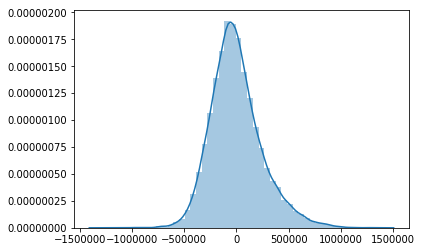

In [420]:
sns.distplot(result.resid)
plt.show()

In [421]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif}, index=X_train.columns)

,vif
const,3.393034e+06
Rooms,2.718242e+00
Distance,7.362027e+00
Bedroom2,2.750636e+00
Bathroom,1.579285e+00
Car,1.259088e+00
Landsize,1.447022e+00
Lattitude,2.608761e+00
Longtitude,2.719172e+00
Propertycount,1.561007e+00


In [422]:
cols = X_train.columns.tolist()
pmax=1

while (len(cols)>0):
    X_1 = X_train[cols]
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values, index=cols)
    pmax = max(p)
    feature_max_p = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_max_p)
    else:
        break
            
selected_features_BE = cols
print(selected_features_BE)

['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Type_t', 'Type_u', 'Method_S', 'Method_SP', 'CouncilArea_Bayside City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Brimbank City Council', 'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council', 'CouncilArea_Darebin City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Glen Eira City Council', 'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Kingston City Council', 'CouncilArea_Knox City Council', 'CouncilArea_Macedon Ranges Shire Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Maribyrnong City Council', 'CouncilArea_Maroondah City Council', 'CouncilArea_Melbourne City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Mitchell Shire Council', 'CouncilArea_Monash City Council', 'CouncilArea_Moonee Valley City Council', 'CouncilArea_Moreland City Council', 'CouncilArea_Port Phillip City C

In [423]:
len(selected_features_BE)

45

In [424]:
from sklearn.metrics import r2_score

lin_reg=sm.OLS(y_train, X_train[selected_features_BE])
result = lin_reg.fit()
#print(result.summary())

y_pred = result.predict(X_test[selected_features_BE])

print('R2 on the test set:  ', r2_score(y_test, y_pred))

R2 on the test set:   0.6611135596414413


### Linear Regression - ML

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size=0.30, random_state=42)

In [426]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression(fit_intercept=True)

lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)

print('R2 of Train: ', r2_score(y_train, y_pred_train))
print('RMSE of Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)

print('\n')
print('R2 of Test: ', r2_score(y_test, y_pred_test))
print('RMSE of Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 of Train:  0.6716232073195503
RMSE of Train:  247993.33384140034


R2 of Test:  0.6609676019630021
RMSE of Test:  252549.94300438795


In [427]:
pd.DataFrame(lr.coef_, index=X_train.columns, columns=['coefs'])

,coefs
Rooms,180009.940965
Distance,-29231.360436
Bedroom2,-31107.119304
Bathroom,63614.291937
Car,9888.764783
Landsize,103.583591
Lattitude,-186007.215865
Longtitude,-58480.068948
Propertycount,-0.833357
Type_t,-205059.223396


#### Feature Selection - RFE

In [428]:
from sklearn.feature_selection import RFE

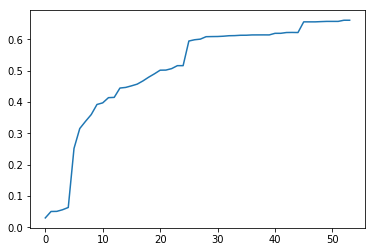

In [429]:
noof_list=54
score_list=[]

for n in range(noof_list):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.30, random_state=42)
    model = LinearRegression()
    rfe = RFE(model, n+1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)

plt.plot(score_list)

In [430]:
score_list

[0.030429126832904548,
 0.05094305422993883,
 0.051302116676710474,
 0.0564621498394946,
 0.06373919724262511,
 0.2520558047570627,
 0.31550709208569494,
 0.338403979826161,
 0.3600807187750371,
 0.3922875476484832,
 0.3974281845248869,
 0.41402076563496926,
 0.4149028266221257,
 0.44469587485971884,
 0.44669511100910664,
 0.4516526418603017,
 0.4571546355383862,
 0.46737289721660186,
 0.47932518488643333,
 0.49000883077286944,
 0.5016659891408073,
 0.5019732242131675,
 0.50665646126836,
 0.5160777253002091,
 0.5161117678518348,
 0.5946797137350512,
 0.5987435199409934,
 0.600729696468594,
 0.6084933292778525,
 0.6088775758781042,
 0.6091079379260634,
 0.6100197867453794,
 0.6115706339983973,
 0.6119475886460533,
 0.6130512694568573,
 0.613162215480934,
 0.6141294407453677,
 0.6141845046419769,
 0.6142607709007293,
 0.6141762431908684,
 0.619232983431206,
 0.6193059088827106,
 0.6218142078110382,
 0.6220503182903045,
 0.6217636608990398,
 0.6558474673193615,
 0.6558052021720236,
 0.655

In [434]:
cols=list(X_train.columns)
model = LinearRegression()
rfe = RFE(model, 46)
X_train_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_train_rfe, y_train)
temp = pd.Series(rfe.support_, index=cols)
selected_features = list(temp[temp==True].index)

print(selected_features)

['Rooms', 'Distance', 'Bathroom', 'Lattitude', 'Longtitude', 'Type_t', 'Type_u', 'Method_S', 'Method_SP', 'CouncilArea_Bayside City Council', 'CouncilArea_Boroondara City Council', 'CouncilArea_Brimbank City Council', 'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council', 'CouncilArea_Darebin City Council', 'CouncilArea_Frankston City Council', 'CouncilArea_Glen Eira City Council', 'CouncilArea_Greater Dandenong City Council', 'CouncilArea_Hume City Council', 'CouncilArea_Kingston City Council', 'CouncilArea_Knox City Council', 'CouncilArea_Macedon Ranges Shire Council', 'CouncilArea_Manningham City Council', 'CouncilArea_Maribyrnong City Council', 'CouncilArea_Maroondah City Council', 'CouncilArea_Melbourne City Council', 'CouncilArea_Melton City Council', 'CouncilArea_Mitchell Shire Council', 'CouncilArea_Monash City Council', 'CouncilArea_Moonee Valley City Council', 'CouncilArea_Moorabool Shire Council', 'CouncilArea_Moreland City Council', 'CouncilArea_Nillumbik S

In [436]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression(fit_intercept=True)

lr.fit(X_train[selected_features], y_train)
y_pred_train = lr.predict(X_train[selected_features])

print('R2 of Train: ', r2_score(y_train, y_pred_train))
print('RMSE of Train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test[selected_features])

print('\n')
print('R2 of Test: ', r2_score(y_test, y_pred_test))
print('RMSE of Test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 of Train:  0.6671531963969286
RMSE of Train:  249675.52627205252


R2 of Test:  0.6558474673193615
RMSE of Test:  254449.82649120997
